$$P_\mathrm{rot} = w.A $$
$$P_\mathrm{rot} = w_0 \mathrm{Nfl} + w_1 \mathrm{Nfl_{68}} ... + w_x \mathrm{Nfl~Nfl_{68}} + ... $$

In [2]:
import pandas as pd
import numpy as np
def train(y, X):
    """
    
    Args:
        y (array): An Nstar array of rotation periods.
        X (array): An Nstar x NX array of features.
        
    Returns:
        weights (array): The array of weights of length NX + 1.
        
    """
    A = np.concatenate((np.ones((len(X), 1)), X), axis=1)  # Shape: Nstars x Nfeatures (incl crossterms)
    AT = A.T
    ATA = np.dot(AT, A)
    
    weights = np.linalg.solve(ATA, np.dot(AT, y))
    return weights

def normalize(x):
    return (x-min(x))/(max(x)-min(x))

df1 = pd.read_csv('../NewGyroKineage/Gaia_Prot_cmatch.csv')

In [3]:
features = [df1["ra"], df1["dec"], df1["parallax"], df1["abs_G"], df1["bp_rp"],
            df1["pmra"], df1["pmdec"], df1["Prot"]]

m = np.isfinite(df1["ra"].values)
for f in features[1:]:
    m &= np.isfinite(f.values)
    
df = df1.iloc[m]
print(np.shape(df), np.shape(df1))

(94064, 103) (94064, 103)


In [4]:
y = df.Prot.values

In [5]:
from itertools import combinations_with_replacement

args = normalize(df["ra"]),  normalize(df["dec"]), normalize(df["parallax"]), \
        normalize(df["abs_G"]), normalize(df["bp_rp"]), normalize(df["pmra"]), normalize(df["pmdec"])
X = list(args)
"""for a, b in combinations_with_replacement(args, 2):
    X.append(a * b)"""
X = np.array(X).T

names = ['ra', 'dec', 'plx', 'Mg', 'bprp', 'pmra', 'pmdec']
X_names = list(names)
"""for a, b in combinations_with_replacement(names, 2):
    X_names.append(a + '*' + b)"""
X_names = np.array(X_names).T

print(np.shape(X), len(args), len(names))

(94064, 7) 7 7


In [6]:
# Define the number of training and validating stars.
Ntrain = int(0.8*len(y))

# Choose stars at random and split.
shuffle_inds = np.arange(len(y))
np.random.shuffle(shuffle_inds)
train_inds = shuffle_inds[:Ntrain]
test_inds = shuffle_inds[Ntrain:]
y_train, X_train = y[train_inds], X[train_inds, :]
y_test, X_test = y[test_inds], X[test_inds, :]

In [7]:
weights = train(y_train, X_train)

In [8]:
A = np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1)
y_predict = np.dot(weights.T, A.T)

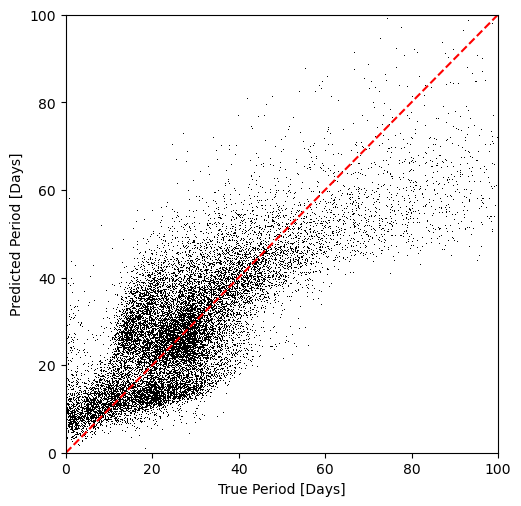

In [10]:
import matplotlib.pyplot as plt
xs = np.linspace(0, 100, 10)

plt.figure(figsize=(6, 6), dpi=100)
plt.plot(y_test, y_predict.T, "k,")
plt.plot(xs, xs, "r--")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel("True Period [Days]")
plt.ylabel("Predicted Period [Days]")
plt.subplots_adjust(left=.18, bottom=.15)

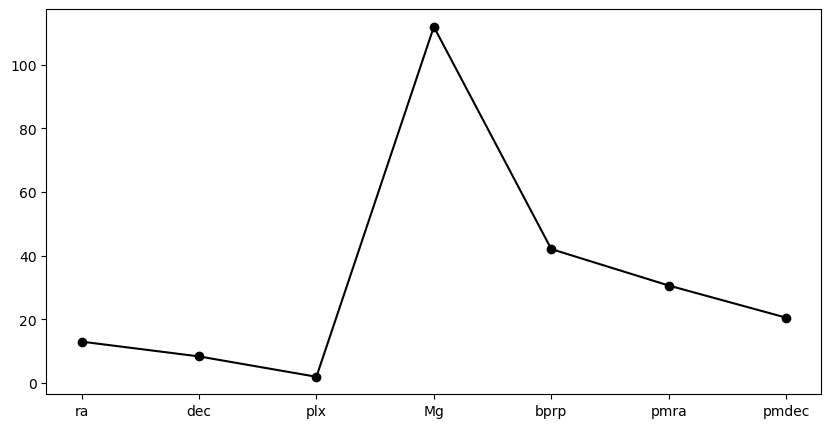

In [56]:
plt.figure(figsize=(10,5))
plt.plot(X_names, abs(weights[:-1]), 'k-o')